In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from pymongo import MongoClient
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
import numpy as np

import matplotlib.pyplot as plt
import datetime
import urllib.request
import json

resp = urllib.request.urlopen('http://localhost:7100/tickets/shanghai?st=2018-03-01&et=2018-04-09')
ticketData = resp.read()
ticketData = json.loads(ticketData)

resp = urllib.request.urlopen('http://localhost:7100/day/rank?st=2018-03-01&et=2018-04-09')
dayData = resp.read()
dayData = json.loads(dayData)

resp = urllib.request.urlopen('http://localhost:7100/weather/history?st=2018-03-01&et=2018-04-09')
weaData = resp.read()
weaData = json.loads(weaData)

resp = urllib.request.urlopen('http://localhost:7001/wait-times/park/shanghai?st=2018-03-01&et=2018-04-09')
parkData = resp.read()
parkData = json.loads(parkData)

[0.00281622]


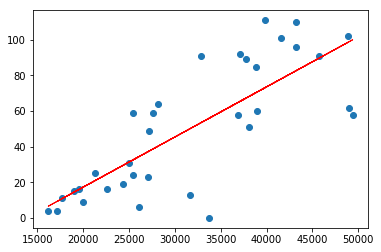

In [33]:
# id = 'attBecomeIronMan'
id = 'attRoaringRapids'

resp = urllib.request.urlopen('http://localhost:7001/wait-times/attractions/shanghai/' + id + '?st=2018-03-01&et=2018-04-09')
attData = resp.read()
attData = json.loads(attData)

attList = []
ticketList = []
flowList = []

for item in attData:
    attList.append(item['waitAvg'])

    
for item in ticketData:
    ticketList.append(item['ticketNum'])
    
    
for item in parkData:
    flowList.append(item['flowMax'])
    
ticketLists = np.array(ticketList)
filterData = np.where(ticketLists < 5000)

x = []
y = []

for index in filterData[0]:
    x.append(flowList[index])
    y.append(attList[index])

x = np.array(x)
y = np.array(y)

xx = x.reshape((len(x), -1))


plt.scatter(x, y)

regr = linear_model.LinearRegression()
regr.fit(xx, y)

plt.plot(xx, regr.predict(xx), color='red',linewidth=1)

print(regr.coef_)